# Midterm Exam
## Each task of the exam is performed on the original images, unless the reverse is said
## At the end of the exam, you need to commit Jupiter's notebook into GitHab in the machine vision repository in a separate folder called Midterm. Each task must be commited in separate corresponding file, e.g. Task1.ipynb.

### Task 1
Apply each filter to image, specify which properties corresponds to filters

(1) corresponds to a low-pass filter in the frequency domain; (2) less than the other specified noise-canceling filters, blurs edges; (3) increases the sharpness of the image (4) works slower than the other specified noise-canceling filters; (5) is not a noise canceling filter; (6) poorly removes noise such as "salt and pepper"; (7) will destroy all lines of one pixel thickness in the image


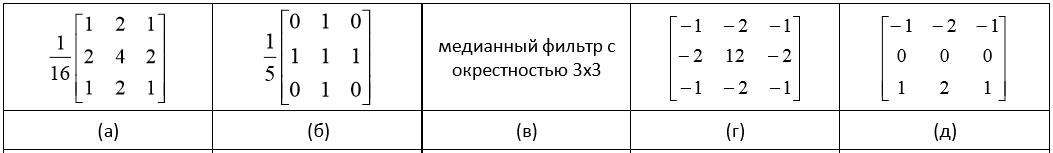

### Task 2
Construct a histogram of the brightness of the image. Apply the operation "linear stretching of brightness" and "the gray world" to the image. Operation "the gray world" needs to be realized independently. The mean can be called three times.

### Task 3
Shake the image with a noise like "salt and pepper". Suppress noise with a median filter. Map the difference between the original and noisy images, and between the adjusted and the original.

### Task 4

Apply the Canny and Sobel edge selection filters to the image. Try different options. Output the result of the selection of edges on the original color image in red.

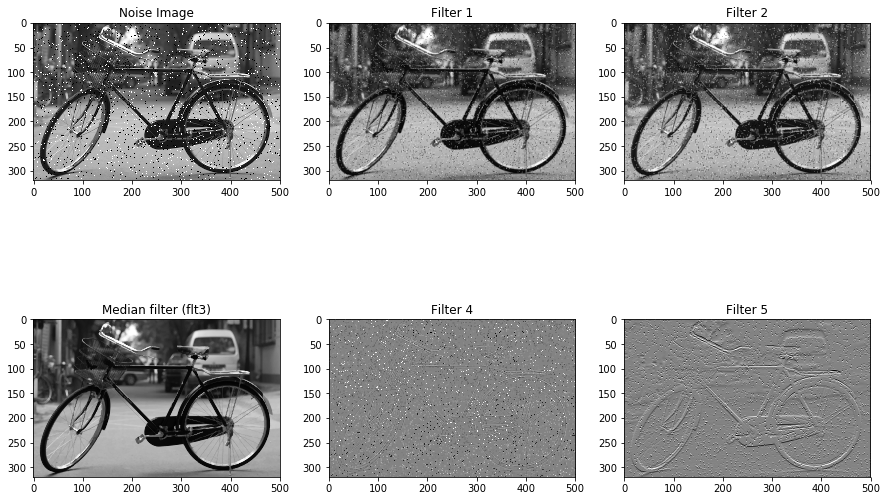

In [2]:
#task1
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as im
import os
import skimage
from skimage import io
from scipy import ndimage
img = io.imread(os.path.join("bycicle.png"), as_grey=True)
filt1 = 1/16*np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]], dtype = 'float32')
filt2 = 1/5*np.array([[0, 1, 0],[1, 1, 1],[0, 1, 0]], dtype = 'float32')
filt4 = np.array([[-1, -2, -1],[-2, 12, -2],[-1, -2, -1]], dtype = 'float32')
filt5 = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]], dtype = 'float32')
out = skimage.util.random_noise(img, mode='s&p', seed=None, clip=True)
flt1 = ndimage.convolve(out, filt1, mode='reflect', cval=0.0)
flt2 = ndimage.convolve(out, filt2, mode='reflect', cval=0.0)
flt3 = ndimage.median_filter(img, 3)
flt4 = ndimage.convolve(out, filt4, mode='reflect', cval=0.0)
flt5 = ndimage.convolve(out, filt5, mode='reflect', cval=0.0)
#Plotting all figures
fig = plt.figure(figsize=(15,10))
plt.subplot(231)
plt.imshow(out, cmap='gray')
plt.title('Noise Image')
plt.subplot(232)
plt.imshow(flt1, cmap='gray')
plt.title('Filter 1')
plt.subplot(233)
plt.imshow(flt2, cmap='gray')
plt.title('Filter 2')
plt.subplot(234)
plt.imshow(flt3, cmap='gray')
plt.title('Median filter (flt3)')
plt.subplot(235)
plt.imshow(flt4, cmap='gray')
plt.title('Filter 4')
plt.subplot(236)
plt.imshow(flt5, cmap='gray')
plt.title('Filter 5')
plt.show()

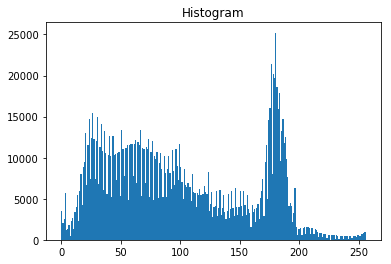

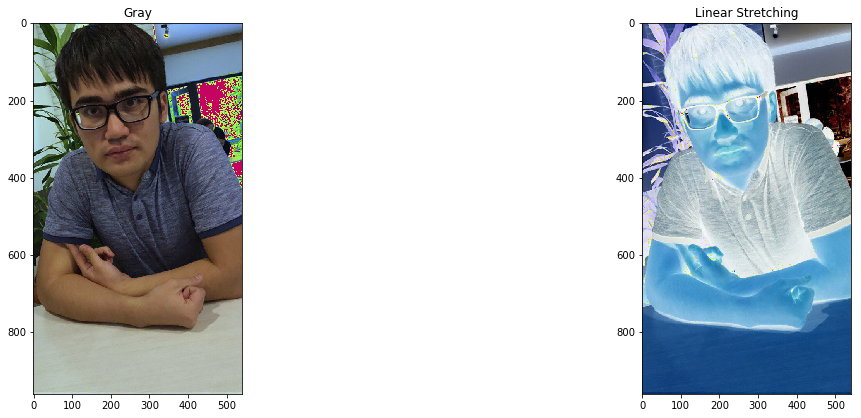

In [6]:
#task 2
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import ndimage
import numpy as np
import cv2
import os
from skimage import io

def func(img_color, x):
    return np.sum(img_color)/x
image = io.imread(os.path.join("Rus1.jpg"))
copy = image
miN = np.amin(image)
maX = np.amax(image)
lin_out = (255*(image-miN))/(maX-miN)
r, g, b = copy[:,:,0], copy[:,:,1], copy[:,:,2]
n = copy.shape[0] 
avg_red = func(r, n)
avg_green = func(g, n)
avg_blue = func(b, n)
avg = (avg_red + avg_green + avg_blue)/3
copy[:,:,0] = r * avg/avg_red
copy[:,:,1] = g * avg/avg_green
copy[:,:,2] = b * avg/avg_blue
#Plotting all figures
plt.hist(image.flatten(),256,[0,256])
plt.title('Histogram')
fig = plt.figure(figsize = (20, 15))
plt.subplot(221), plt.imshow(copy)
plt.title('Gray')
plt.subplot(222), plt.imshow(lin_out, cmap = 'gray')
plt.title('Linear Stretching')
plt.show()

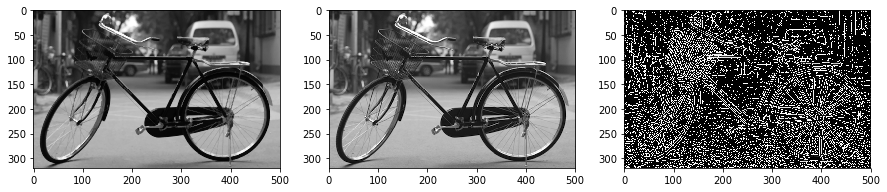

In [9]:
#task 3
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib.image as im
import os
import skimage
from skimage import io
from scipy import ndimage
img = io.imread("bycicle.png", as_grey=True)
#salt and pepper noise
img_noise = skimage.util.random_noise(img, mode='s&p', seed=None, clip=True)
# Median filter
flt = ndimage.median_filter(img, 3)
#Plotting allfigures
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(flt, cmap='gray')
plt.subplot(132)
plt.imshow((img-img_noise), cmap='gray')
plt.subplot(133)
plt.imshow((img-flt), cmap='gray')
plt.show()

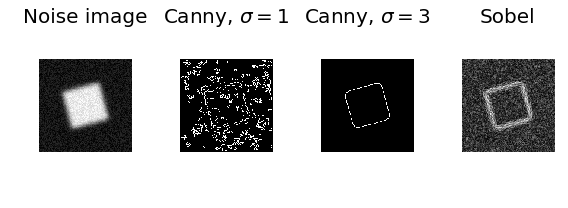

In [10]:
#task4
import numpy as np
#from skimage import data
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage as ndi
from skimage import feature
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1
im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)


dx = ndi.sobel(im, 0)  
dy = ndi.sobel(im, 1)  
mag = np.hypot(dx, dy)  
mag *= 255.0 / np.max(mag)  

# Plotting
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Noise image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny, $\sigma=3$', fontsize=20)

ax4.imshow(mag, cmap=plt.cm.gray)
ax4.axis('off')
ax4.set_title('Sobel', fontsize=20)

fig.tight_layout()

plt.show()